In [4]:
import os
import sys
import string
import torch
import seaborn as sns
from pathlib import Path
from torch.utils.data import DataLoader
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

AxesSubplot(0.125,0.11;0.775x0.77)


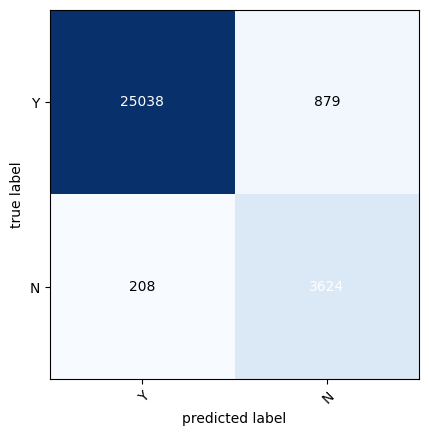

In [9]:
binary1 = np.array([[4, 884,],
                    [47, 14552]])


fig, ax = plot_confusion_matrix(conf_mat=binary1, fontcolor_threshold=0.2, hide_ticks=False, show_normed=True, class_names=["Y", "N"])
# cmap = sns.color_palette("viridis", as_cmap=True)
all_axes = fig.get_axes()
print(all_axes)
all_axes[0].set_xlabel("predicted full stop")
all_axes[0].set_ylabel("true full stop")
plt.show()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
b_paths = [os.path.abspath(os.path.join('..', '..')), os.path.abspath(os.path.join('..')), os.path.abspath(os.path.join('..', 'scripts'))]
for b_path in b_paths:
    if b_path not in sys.path:
        sys.path.append(b_path)

BASE_DIR = Path(os.getcwd()).parent.parent.resolve()
%cd $BASE_DIR

I:\My Drive\master_thesis_experiments\glyph-recognition-experiments


In [4]:
from models.scripts.transformer.BERT_decoder import BertTransformer
from models.scripts.transformer.Transformer import Transformer
from models.scripts.transformer.utils import build_vocab

In [5]:
CHARS = list(string.ascii_letters)
DIGITS = [i for i in string.digits]
LOWERCASE_LETTERS = [i for i in string.ascii_lowercase]
UPPERCASE_LETTERS = [i for i in string.ascii_uppercase]
MISC_CHARS = ['.', ',', '!', '?', '+', '-', '/', '*', '=', '(', ')', ]
NO_SPACE = [""]
NEW_LINE = ['\n']
BLANK_SPACE = [" "]

In [6]:
from tokenizers import Tokenizer
TOKENIZER_FILE = os.path.join("word_sources", "tokenizer-big_multi-normalized.json")
VOCAB = Tokenizer.from_file(TOKENIZER_FILE)


N_TOKENS = VOCAB.get_vocab_size()
PAD_IDX = VOCAB.token_to_id('<pad>')
BOS_IDX = VOCAB.token_to_id('<bos>')
EOS_IDX = VOCAB.token_to_id('<eos>')


In [7]:
from models.scripts.transformer.utils import preprocess_dataset, pad_collate_fn, preprocess_with_lang
from models.scripts.generate_dataset import WordDatasetGenerator, WordGenerator

BATCH_SIZE=16
VERSION = "test"

words = ['Gold?',
'It has never been easy to have. a rational conversation about the value of gold',
'Lately with gold prices up more than over the last decade it is harder than ever',
'Just last December (fellow economists) Martin Feldstein',
'and Nouriel Roubini each penned op-eds bravely questioning bullish market sentiment',
'sensibly pointing out golds risks',
'Wouldn t you know it',
'Since their articles appeared the price of gold has moved up still further',
'Gold prices even hit a recordhigh recently',
'Last December many gold/bugs were arguing that the price was inevitably headed for',
'Now emboldened by continuing appreciation some are suggesting',
'that gold could be headed, even higher than that',
'One successful gold investor recently explained to me that stock prices',
'languished for a more than a decade before the Dow Jones index crossed the mark in the early',
'Since then the index has climbed above',
'Now that gold has crossed the magic barrier, why cant it increase tenfold too?',
'Admittedly getting to a much higher price for gold',
'is not quite the leap of imagination that* it seems?',
'After adjusting for inflation todays price is nowhere near the alltime high of = January',
'Back then, gold hit or well over in todays dollars',
'But January was arguably a freak peak',
'during a period of heightened geopolitical instability',
'At todays price is probably more than double very longterm inflation',
'adjusted average gold prices',
'So what could justify another huge increase in gold prices from here 3',
'One answer of course is a complete collapse of the US dollar',
'Mirco Ramo beautiful sexy.',
'Houses of Parliaments are very big!',
'Italy voted as best country in the world']
BRUSH_SPLIT=0.15
d_gen = WordDatasetGenerator(vocab = VOCAB,
                             expr_mode='all',
                             words=words,
                             extended_dataset=False)
d_gen.generate()
d_gen.add_training_words(words[int(len(words)*(1-BRUSH_SPLIT)):])
train, valid, test = d_gen.generate_from_cache()

Generating datasets...


Initializing cache...


Test set progress: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Processed test batch... (Total=7).


Train set progress: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]


Processed train batch... (Total=17).


Valid set progress: 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


Processed valid batch... (Total=5).


100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Using cached dataset file in cache\words_cache\words_stroke_100_29.h5


In [8]:
from models.scripts.defaults import *
train_set = DataLoader(preprocess_dataset(train, VOCAB,  os.path.join(d_gen.fname, "train.pt"), total_len=d_gen.get_learning_set_length("train")), batch_size=BATCH_SIZE, shuffle=True, collate_fn=pad_collate_fn)
valid_set = DataLoader(preprocess_dataset(valid, VOCAB,  os.path.join(d_gen.fname, "valid.pt"), total_len=d_gen.get_learning_set_length("valid"),), batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_collate_fn)
#test_set = DataLoader(preprocess_dataset(test, VOCAB,  os.path.join(d_gen.fname, "test.pt"), total_len=d_gen.get_learning_set_length("test")), batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_collate_fn)

cache\preprocessed_datasets\words_stroke_100_29\train.pt


100%|██████████| 44/44 [00:01<00:00, 25.16it/s]


cache\preprocessed_datasets\words_stroke_100_29\valid.pt


100%|██████████| 5/5 [00:00<00:00, 20.92it/s]


In [9]:
x, y = next(iter(train_set))
print(x[0].shape, y[0], y[0].shape)
print(x[0, :80, :50])

torch.Size([200, 128]) tensor([   2, 2255,   92, 1099,  495,  418, 1207, 1711,  241,  240, 1592,    3,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1]) torch.Size([100])
tensor([[ 2.0000,  2.0000,  2.0000,  ...,  2.0000,  2.0000,  2.0000],
        [ 0.3762,  0.3462,  0.4096,  ..., -5.0000, -5.0000, -5.0000],
        [ 0.4806,  0.3796,  0.4825,  ..., -5.0000, -5.0000, -5.0000],
        ...,
        [-5.0000, -5.0000, -5.0000,  ..., -5.0000, -5.0000, -5.

I:\My Drive\master_thesis_experiments\glyph-recognition-experiments\models\scripts\transformer\utils.py:139: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy.append(torch.tensor(y_, dtype=torch.int64))


# Bert Transformer

In [24]:
model = BertTransformer("multi", VOCAB, n_tokens=N_TOKENS, encoder_name="en-en11", decoder_name="new", conv_layer_name="en-en11")
#model_classic = Transformer("ehy", VOCAB, n_tokens=N_TOKENS, dec_max_length=100)

## TODO try with random tensors, random db samples, plug working encoder and let's see
model.count_parameters()
model.requires_grad_(False)
for layer in model.decoder.bert.encoder.layer:
    layer.crossattention.requires_grad_(True)

print(f"Encoder trainable parameters: {sum(p.numel() for p in model.encoder.parameters() if p.requires_grad):,}.")
print(f"Decoder trainable parameters: {sum(p.numel() for p in model.decoder.parameters() if p.requires_grad):,}.")
model.to(model.device)
#model_classic.to(model_classic.device)
print()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['bert.encoder.layer.5.crossattention.

The model has 141,914,216 trainable parameters.
Encoder trainable parameters: 0.
Decoder trainable parameters: 28,366,848.



In [ ]:
from torch import nn

LEARNING_RATE = 5e-4
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.5)

In [ ]:
model.train_loop(resume=False,
                 train_set=train_set,
                 valid_set=valid_set,
                 test_set=None,
                 optimizer=optimizer,
                 scheduler=scheduler,
                 criterion=criterion,
                 n_epochs=3)

In [16]:
test_set_iter = iter(test_set)
x_pred, y_pred = next(test_set_iter)

x_pred = x_pred.to(model.device)
y_pred = y_pred.to(model.device)

NameError: name 'test_set' is not defined

Index: 4 



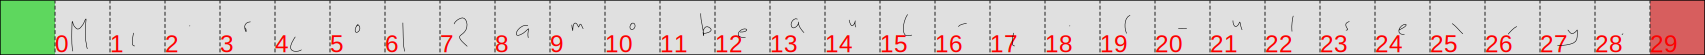

Ground truth =>  [2, 38, 60, 69, 54, 66, 4, 43, 52, 64, 66, 4, 53, 56, 52, 72, 71, 60, 57, 72, 63, 4, 70, 56, 75, 76, 12, 3] 

Ground Truth: bos>Mirco Ramo beautiful sexy.<eos (len=26)
- Prediction:                                                                                                      (len=98)
Normalized Levenshtein distance is: 0.8699551569506726


In [18]:
from IPython.core.display import SVG
from models.scripts.transformer.utils import strokes_to_svg, tensor_to_word
import random
from models.scripts.utils import Levenshtein_Normalized_distance

ind = random.choice(range(0, y_pred.shape[0]))
print("Index:", ind, "\n")


svg_str = strokes_to_svg(x_pred[ind], {'height':100, 'width':100}, d_gen.padding_value, BOS_IDX, EOS_IDX)
display(SVG(data = svg_str))

eos_tensor = torch.zeros(x_pred[ind].size(-1)) + d_gen.eos_idx

prediction, (cross_att, dec_att, enc_att), _ = model.predict(x_pred[ind].unsqueeze(0))

gt = tensor_to_word(y_pred[ind], VOCAB)
gt_list = [i for i in y_pred[ind].tolist() if i != 1]
gt_length = len([i for i in y_pred[ind] if i not in [PAD_IDX, BOS_IDX, EOS_IDX]])

print("Ground truth => ", gt_list , '\n')

# Show ground truth and prediction along with the lengths of the words/glyphs
print(f"Ground Truth: {''.join(gt).strip('<pad>')} (len={gt_length})")
print(f"- Prediction: {prediction.strip('<bos>').strip('<eos>').strip('<pad>')} (len={len(prediction)-2})")

print(f"Normalized Levenshtein distance is: {Levenshtein_Normalized_distance(a=''.join(gt).strip('<bos>').strip('<pad>').strip('<eos>'), b=prediction.strip('<bos>').strip('<eos>').strip('<pad>'))}")